In [59]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import json

from matplotlib import pyplot as pp
%pylab inline
pp.rcParams['figure.figsize'] = (15,15)
import re
import seaborn as sns
sns.set_style('darkgrid')

from datetime import datetime as dt, timezone as tz, timedelta as td
from itertools import chain

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

Populating the interactive namespace from numpy and matplotlib


/Users/vykukushkin/env36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### read data

In [2]:
def read_file(filename):
    df = pd.read_csv(filename, sep='\t', encoding='utf-8')
    print(df.shape)
    return df

In [3]:
equipment = read_file("../data/equipment.tsv")
equipment['class'] = equipment['class'].str.replace('\\xa0', ' ')
equipment.head()

(541, 4)


,id,class,available_hours,speed_per_hour
0,7596f724-c038-11e6-80c1-e1497160343b,Масс-спектрометр,NaN,60
1,0ea79b45-aa16-11e5-80d6-00505692e771,Бокс химической защиты с двойной системой фильтрации,NaN,100
2,e2de4578-93a6-11e7-80da-00155df02900,Хроматограф газовый,NaN,55
3,cd806b45-26fd-11e5-80c0-00505692e771,Весы,NaN,95
4,8392404a-f2a4-11e6-80d2-00155df02900,Хроматограф жидкостный,NaN,70


In [70]:
def fix_date_format(dt):
    y, m, d = dt.split('-')
    m = ('0'+m)[-2:]
    d = ('0'+d)[-2:]
    return '-'.join((y,m,d))

In [71]:
orders = read_file("../data/order.tsv")
orders['deadline'] = orders.deadline.apply(fix_date_format)
orders.head()

(124949, 4)


,_id,product_id,amount,deadline
0,0,5c94953dc9e77c0001d5e130,520,2019-04-01
1,1,5c94953dc9e77c0001d5e12b,1000,2019-04-03
2,2,5c94953dc9e77c0001d5e131,360,2019-04-10
3,3,5c94953dc9e77c0001d5e141,90,2019-03-25
4,4,5c94953dc9e77c0001d5e139,860,2019-04-16


In [72]:
orders.deadline.min()

'2019-03-22'

In [73]:
orders.groupby("product_id")['amount'].sum()

product_id
5c94953dc9e77c0001d5e121    1790540
5c94953dc9e77c0001d5e122    1764620
5c94953dc9e77c0001d5e123    1775480
5c94953dc9e77c0001d5e124    1769530
5c94953dc9e77c0001d5e125    1725090
5c94953dc9e77c0001d5e126    1776310
5c94953dc9e77c0001d5e127    1763280
5c94953dc9e77c0001d5e128    1767630
5c94953dc9e77c0001d5e129    1765300
5c94953dc9e77c0001d5e12a    1782380
5c94953dc9e77c0001d5e12b    1788300
5c94953dc9e77c0001d5e12c    1783690
5c94953dc9e77c0001d5e12d    1763990
5c94953dc9e77c0001d5e12e    1795520
5c94953dc9e77c0001d5e12f    1750150
5c94953dc9e77c0001d5e130    1778150
5c94953dc9e77c0001d5e131    1774410
5c94953dc9e77c0001d5e132    1774700
5c94953dc9e77c0001d5e133    1783990
5c94953dc9e77c0001d5e134    1746130
5c94953dc9e77c0001d5e135    1761170
5c94953dc9e77c0001d5e136    1769550
5c94953dc9e77c0001d5e137    1773810
5c94953dc9e77c0001d5e138    1767910
5c94953dc9e77c0001d5e139    1766820
5c94953dc9e77c0001d5e13a    1786480
5c94953dc9e77c0001d5e13b    1791420
5c94953dc9e77c000

In [74]:
product = read_file("../data/product.tsv")
product['equipment_class'] = product['equipment_class'].apply(lambda x: json.loads(x.replace("'", '"').replace("\\xa0", " ")))
product.head()

(37, 2)


,_id,equipment_class
0,5c94953dc9e77c0001d5e130,"[Хроматограф жидкостный, Насос, Принтер для этикеток, Сухожаровой шкаф, Автостейнер]"
1,5c94953dc9e77c0001d5e12b,"[Вытяжной шкаф, pH-метр, Система капиллярного электрофореза]"
2,5c94953dc9e77c0001d5e131,"[Манипулятор переносящий, Криохранилище, Высокоскоростной смеситель-гранулятор, Хромато-масс-спектрометр]"
3,5c94953dc9e77c0001d5e141,"[Рециркулятор, Изолятор, Счетчик клеток]"
4,5c94953dc9e77c0001d5e139,"[Лабораторное оборудование, Синтезатор олигонуклеотидов, Производственное оборудование, Шейкер, Амплификатор, Изолятор, Аппарат для определения растворимости таблеток, Лабораторный 3D смеситель]"


### check that all equipment classes are read properly

In [75]:
product_equipments = set([v for l in product.equipment_class.values for v in l])

In [76]:
product_equipments - set(equipment["class"].values.tolist())

set()

In [77]:
equipment['class'].nunique()

116

### EDA

In [78]:
# schedule = {%equipment_id%: {%datetime%: {'order_id': %order_id%, 'amount': %order_amount%}, ...}, ...}


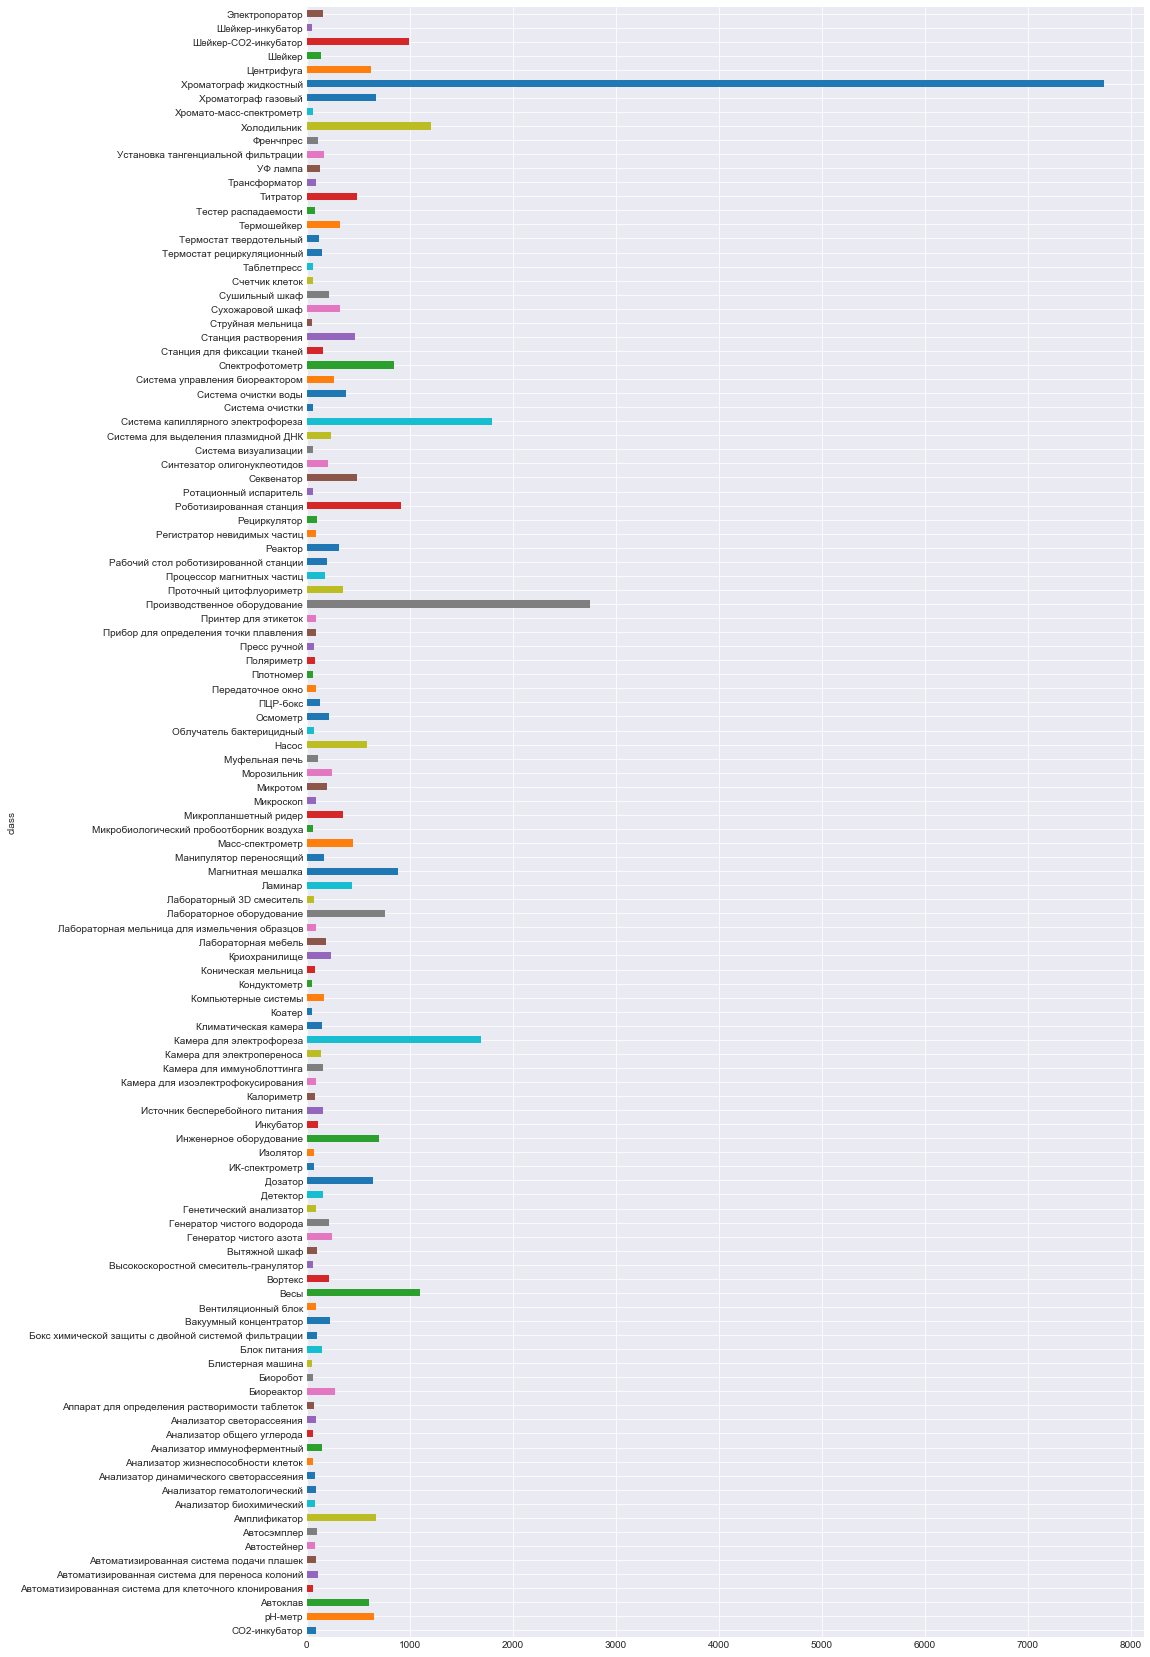

In [84]:
pp.figure(figsize=(15,30))
equipment.groupby('class')['speed_per_hour'].sum().sort_index().plot.barh()

In [85]:
orders_one_day = (orders[orders['deadline']=='2019-03-22']
                  .merge(product, left_on='product_id', right_on='_id', suffixes=('', '_y'))
                  .drop(['deadline', '_id_y'], axis=1))
orders_one_day.shape

(4169, 4)

In [86]:
orders_one_day.head()

,_id,product_id,amount,equipment_class
0,42,5c94953dc9e77c0001d5e142,680,"[Вакуумный концентратор, Титратор, Насос, Анализатор биохимический, Источник бесперебойного питания, Лабораторная мельница для измельчения образцов, Трансформатор, Система очистки, Таблетпресс]"
1,2696,5c94953dc9e77c0001d5e142,920,"[Вакуумный концентратор, Титратор, Насос, Анализатор биохимический, Источник бесперебойного питания, Лабораторная мельница для измельчения образцов, Трансформатор, Система очистки, Таблетпресс]"
2,3660,5c94953dc9e77c0001d5e142,880,"[Вакуумный концентратор, Титратор, Насос, Анализатор биохимический, Источник бесперебойного питания, Лабораторная мельница для измельчения образцов, Трансформатор, Система очистки, Таблетпресс]"
3,4301,5c94953dc9e77c0001d5e142,560,"[Вакуумный концентратор, Титратор, Насос, Анализатор биохимический, Источник бесперебойного питания, Лабораторная мельница для измельчения образцов, Трансформатор, Система очистки, Таблетпресс]"
4,5588,5c94953dc9e77c0001d5e142,60,"[Вакуумный концентратор, Титратор, Насос, Анализатор биохимический, Источник бесперебойного питания, Лабораторная мельница для измельчения образцов, Трансформатор, Система очистки, Таблетпресс]"


In [87]:
res = []
for idx, row in orders_one_day.to_dict(orient='index').items():
    classes = row['equipment_class']
    row.pop('equipment_class')
    total_amount = 0
    for c in classes:
        row_on_class = row.copy()
        row_on_class['equipment_class'] = c
        row_on_class['amount'] = int(np.ceil(row_on_class['amount'] / len(classes)))
        total_amount += row_on_class['amount']
        if total_amount > row['amount']:
            row_on_class['amount'] -= (total_amount - row['amount'])
            total_amount = row['amount']
        res.append(row_on_class)
orders_one_day = pd.DataFrame(res)
orders_one_day.head(n=10)

,_id,amount,equipment_class,product_id
0,42,76,Вакуумный концентратор,5c94953dc9e77c0001d5e142
1,42,76,Титратор,5c94953dc9e77c0001d5e142
2,42,76,Насос,5c94953dc9e77c0001d5e142
3,42,76,Анализатор биохимический,5c94953dc9e77c0001d5e142
4,42,76,Источник бесперебойного питания,5c94953dc9e77c0001d5e142
5,42,76,Лабораторная мельница для измельчения образцов,5c94953dc9e77c0001d5e142
6,42,76,Трансформатор,5c94953dc9e77c0001d5e142
7,42,76,Система очистки,5c94953dc9e77c0001d5e142
8,42,72,Таблетпресс,5c94953dc9e77c0001d5e142
9,2696,103,Вакуумный концентратор,5c94953dc9e77c0001d5e142


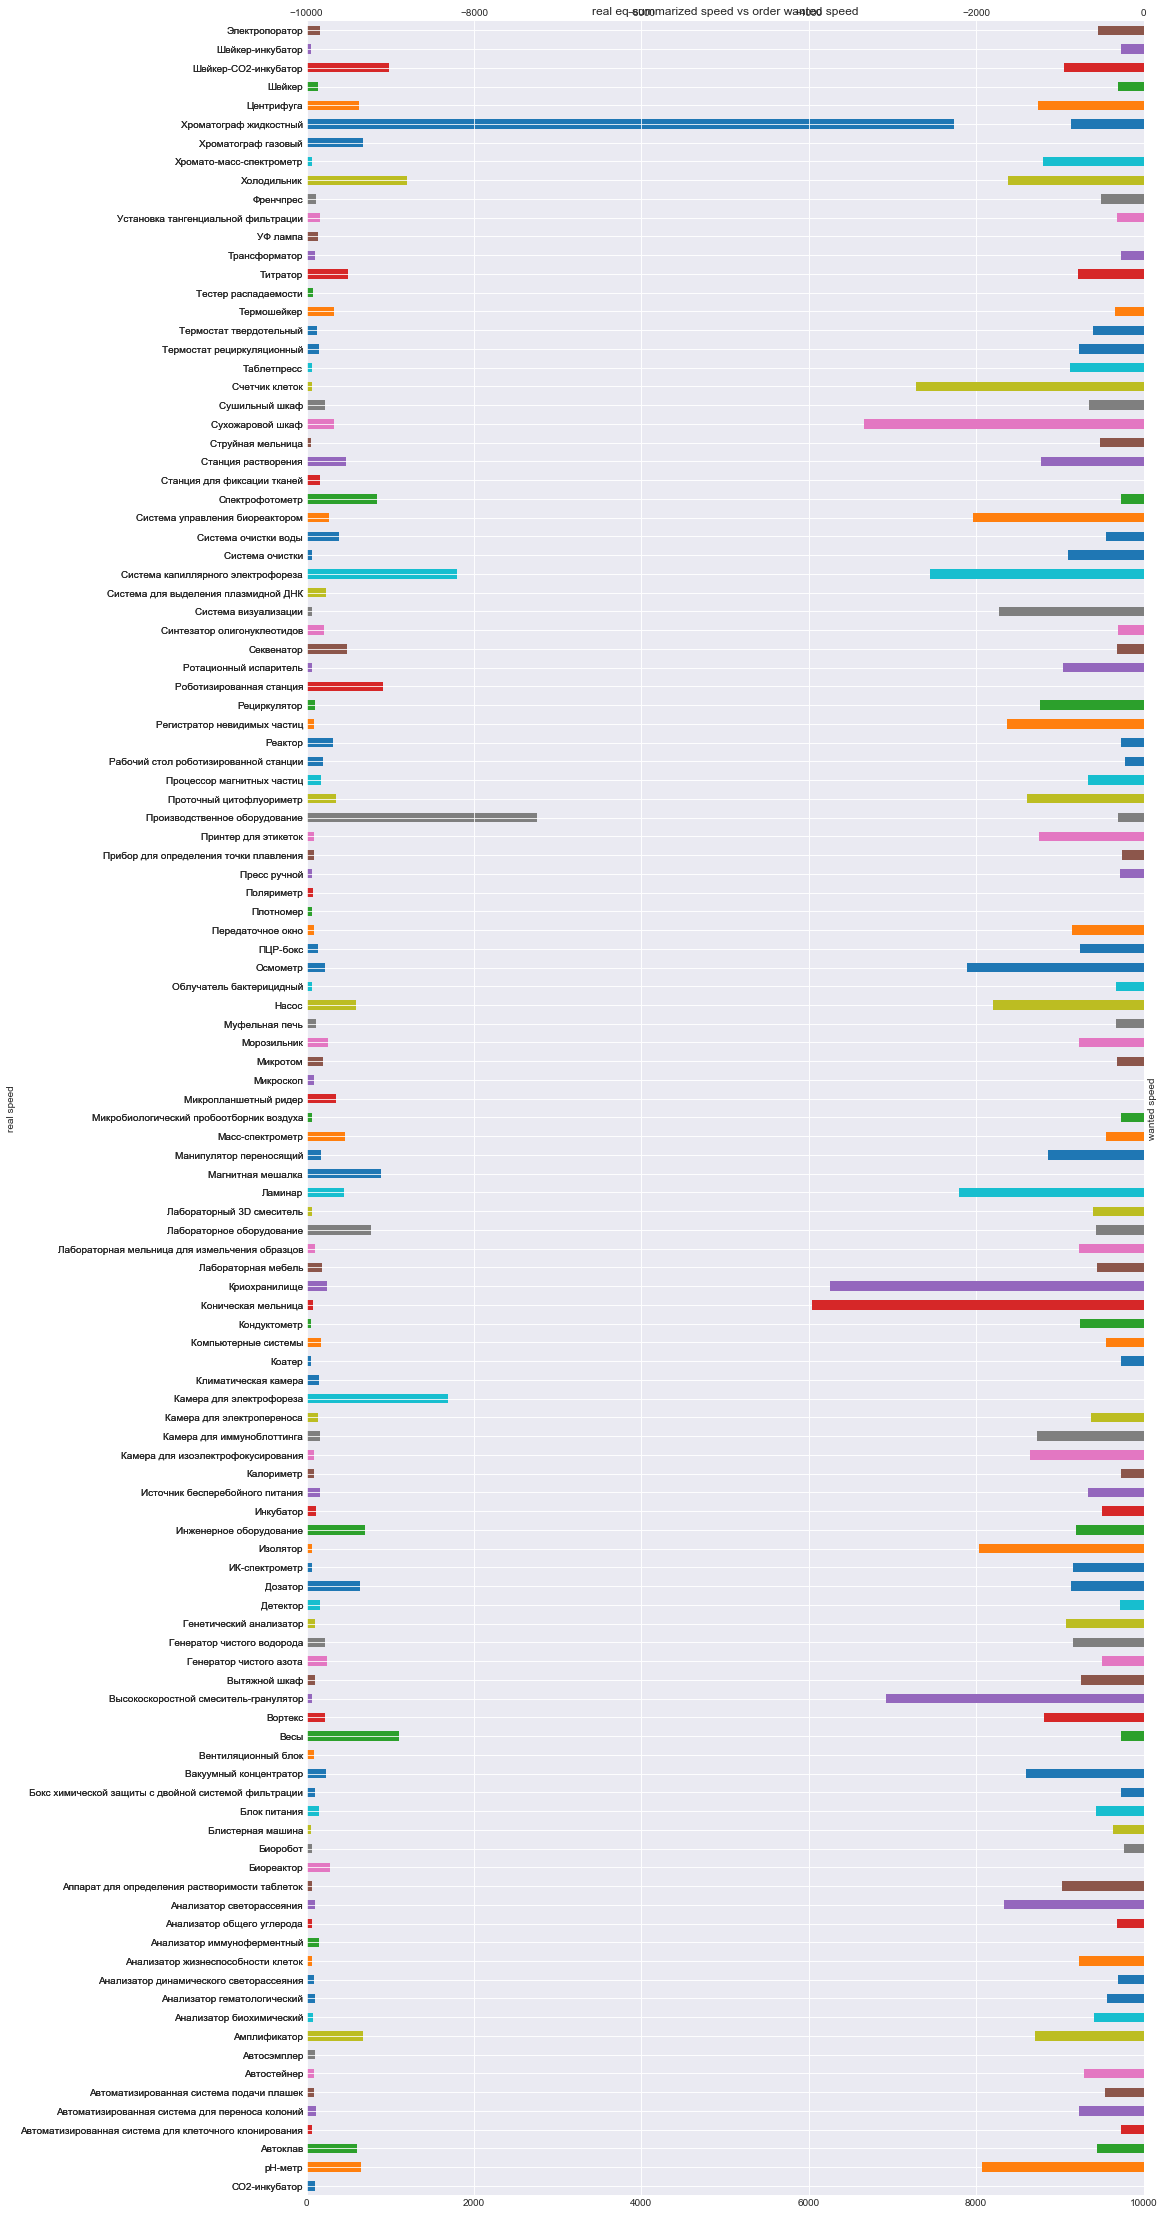

In [88]:
fig,axt = pp.subplots(1, figsize=(15,40))
equipment_classes_aggregated = equipment.groupby('class')['speed_per_hour'].sum().sort_index()
necessary_classes = equipment_classes_aggregated.index

equipment_classes_aggregated.plot.barh()
pp.title("real eq summarized speed vs order wanted speed")

axb = axt.twiny()

(orders_one_day.groupby('equipment_class')['amount'].sum()[necessary_classes].fillna(0) / -24).plot.barh(ax=axb)

# Set some sensible axes limits
axt.set_xlim(0,10000)
axb.set_xlim(-10000,0)

# Add some axes labels
axt.set_ylabel('real speed')
axb.set_ylabel('wanted speed')

# Need to manually move axb label to right hand side
axb.yaxis.set_label_position('right')
pp.show()


In [89]:
total_possible_speed = equipment.speed_per_hour.sum() * 24
print('total speed per day for all equipments, it/day:', total_possible_speed)
print('total awaited products: ', orders.groupby('deadline')['amount'].sum())

total speed per day for all equipments, it/day: 974040
total awaited products:  deadline
2019-03-22    2182830
2019-03-23    2194330
2019-03-24    2188060
2019-03-25    2195910
2019-03-26    2168320
2019-03-27    2208390
2019-03-28    2186920
2019-03-29    2195470
2019-03-30    2180550
2019-03-31    2199410
2019-04-01    2160240
2019-04-02    2157890
2019-04-03    2183860
2019-04-04    2183850
2019-04-05    2170960
2019-04-06    2161580
2019-04-07    2173890
2019-04-08    2184270
2019-04-09    2192370
2019-04-10    2195130
2019-04-11    2173380
2019-04-12    2179770
2019-04-13    2165780
2019-04-14    2231130
2019-04-15    2203130
2019-04-16    2217440
2019-04-17    2181950
2019-04-18    2201510
2019-04-19    2177640
2019-04-20    2200660
Name: amount, dtype: int64


Отстой. Можностей в 2 раза меньше, чем поступает заказов

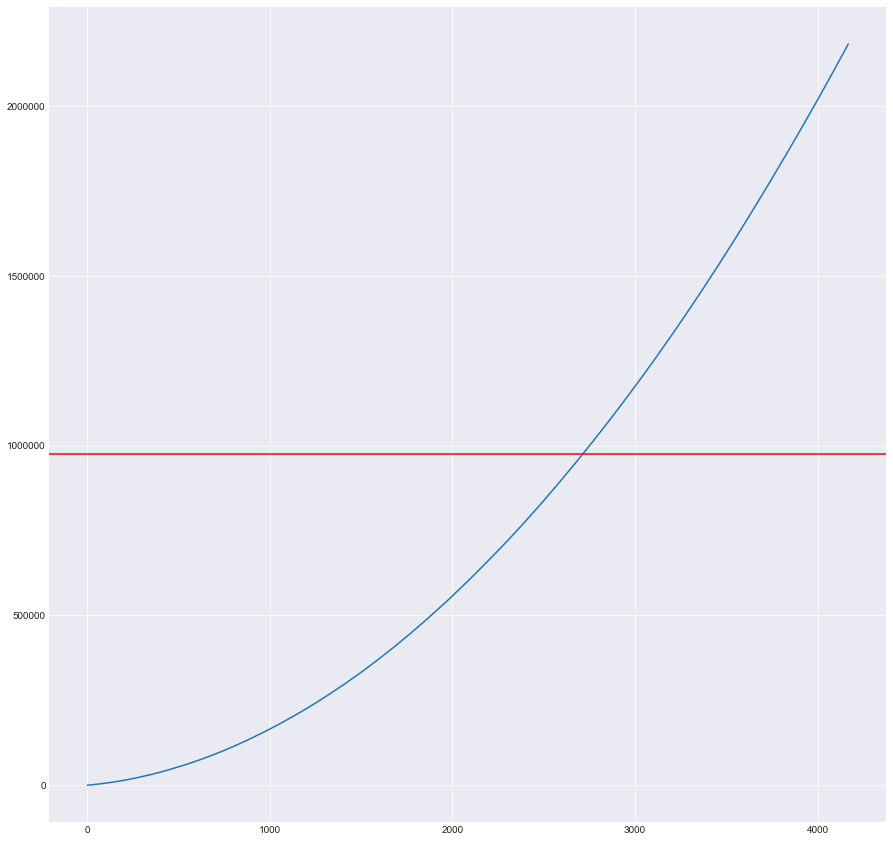

In [90]:
pp.plot(orders_one_day.groupby('_id')['amount'].sum().sort_values().cumsum().values)
pp.axhline(total_possible_speed, color='red')

Если брать в работу только самые маленькие заказы, сколько мы теоретически могли бы успевать обработать? (с учетом, что заказы поступают 7 дней в неделю, а оборудование работает только 5 дней)

In [91]:
(orders_one_day.groupby('_id')['amount'].sum().sort_values().cumsum() < total_possible_speed*5/7).mean()

0.5418565603262173